In [1]:
from retinaface import RetinaFace
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [1]:

def splitToBatches(video_list, batch_size=10):
    output = []
    curr_batch = []
    for vid in video_list:
        if len(curr_batch) < batch_size:
            curr_batch.append(vid)
            continue
        else:
            output.append(curr_batch)
            curr_batch = [vid]
    if curr_batch != []:
        output.append(curr_batch)
    return output

In [8]:
# return landmarks as 2d array [[x, y]....]
def getLandmarkCoords(detection):
    coords = []
    for face in detection.keys():
        coords.extend([detection[face]['landmarks'][key]
                      for key in detection[face]['landmarks'].keys()])
    return np.array(coords)


In [24]:
def getEyeDistRatio(face_det):
    return abs((face_det['landmarks']['left_eye'][0] - face_det['landmarks']['right_eye'][0]) / \
      (face_det['facial_area'][2] - face_det['facial_area'][0]))

In [27]:
profile_dets = RetinaFace.detect_faces("examples/face-profile.jpg")
front_dets = RetinaFace.detect_faces("examples/face-front.jpg")
three_quarter_dets = RetinaFace.detect_faces("examples/face-three-quarter.jpg")


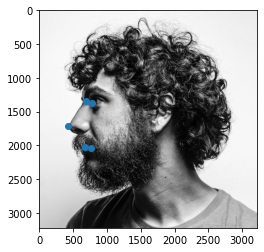

In [28]:
plt.imshow(cv2.imread("examples/face-profile.jpg"))
plt.scatter(*getLandmarkCoords(profile_dets).T)

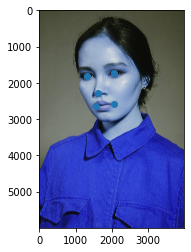

In [29]:
plt.imshow(cv2.imread("examples/face-front.jpg"))
plt.scatter(*getLandmarkCoords(front_dets).T)

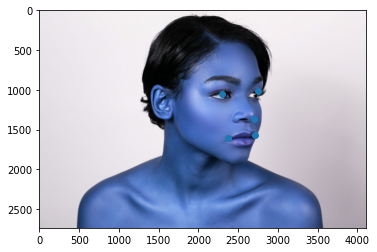

In [30]:
plt.imshow(cv2.imread("examples/face-three-quarter.jpg"))
plt.scatter(*getLandmarkCoords(three_quarter_dets).T)

In [32]:
getEyeDistRatio(front_dets["face_1"])

0.4354942089787722

In [33]:
getEyeDistRatio(profile_dets["face_1"])

0.08064634559062205

In [34]:
getEyeDistRatio(three_quarter_dets["face_1"])

0.3937847184216287